In [1]:
import pandas as pd

#url = 'https://raw.githubusercontent.com/thambidge/Insight/master/Freemont%20Bridge%20Hourly.csv'
#data = pd.read_csv(url, index_col='Date', parse_dates=True)
#data=data.iloc[:,:]
#data.columns = ['West', 'East']
#data.fillna(0, inplace=True)
#data['Total'] = data.eval('East + West')
#data.head(10)

In [11]:
# API
#!pip install sodapy
from sodapy import Socrata

#client = Socrata(data.seattle.gov, 
#                 ci8AIaUNtTgxLnl6Ubkh573o1)
#                 userame="timothy.hambidge@gmail.com",
#                 password="")

#client = Socrata("data.seattle.gov", None)
#results = client.get("4xy5-26gy", limit=50000) ##monthy counts 
#results_df = pd.DataFrame.from_records(results)
#results_df.shape
#65db-xm6k
#7mre-hcut
#mdbt-9ykn  grouped by month

bridge1 = pd.read_json("https://data.seattle.gov/resource/7mre-hcut.json?$limit=50000&$offset=0")
bridge2 = pd.read_json("https://data.seattle.gov/resource/7mre-hcut.json?$limit=50000&$offset=50000")
bridge = bridge1.append(bridge2,ignore_index = True)
bridge.shape

#?$select=date_extract_hh(date) as hour_of_day, primary_type, count(*)&$group=hour_of_day, primary_type
#bridge = bridge.iloc[:,:]
#bridge.rename(index=str, columns={"date": "Date" ,"fremont_bridge_nb": "North", "fremont_bridge_sb": "South"})
#bridge.columns = ['Date','North', 'South']
#bridge.fillna(0, inplace=True)
#bridge['Total'] = data.eval('North + South')

(59088, 3)

In [12]:
bridge.head(10)

,date,fremont_bridge_nb,fremont_bridge_sb
0,2013-01-01 14:00:00,32.0,43.0
1,2019-06-06 11:00:00,83.0,49.0
2,2017-10-19 08:00:00,150.0,182.0
3,2016-09-19 18:00:00,210.0,134.0
4,2015-08-03 01:00:00,3.0,2.0
5,2016-08-07 14:00:00,64.0,70.0
6,2018-12-23 06:00:00,2.0,0.0
7,2015-10-31 16:00:00,21.0,21.0
8,2015-04-09 12:00:00,103.0,1.0
9,2016-03-30 19:00:00,155.0,94.0


In [13]:
bridge = bridge.rename(columns={'fremont_bridge_nb':'northbound', 'fremont_bridge_sb':'southbound'})
bridge['date'] = pd.to_datetime(bridge['date'])
bridge = bridge.set_index(bridge['date'])
#bridge = bridge.drop(['date'], axis=1)
bridge.head(10)

,date,northbound,southbound
date,,,
2013-01-01 14:00:00,2013-01-01 14:00:00,32.0,43.0
2019-06-06 11:00:00,2019-06-06 11:00:00,83.0,49.0
2017-10-19 08:00:00,2017-10-19 08:00:00,150.0,182.0
2016-09-19 18:00:00,2016-09-19 18:00:00,210.0,134.0
2015-08-03 01:00:00,2015-08-03 01:00:00,3.0,2.0
2016-08-07 14:00:00,2016-08-07 14:00:00,64.0,70.0
2018-12-23 06:00:00,2018-12-23 06:00:00,2.0,0.0
2015-10-31 16:00:00,2015-10-31 16:00:00,21.0,21.0
2015-04-09 12:00:00,2015-04-09 12:00:00,103.0,1.0


Text(0,0.5,'weekly trips')

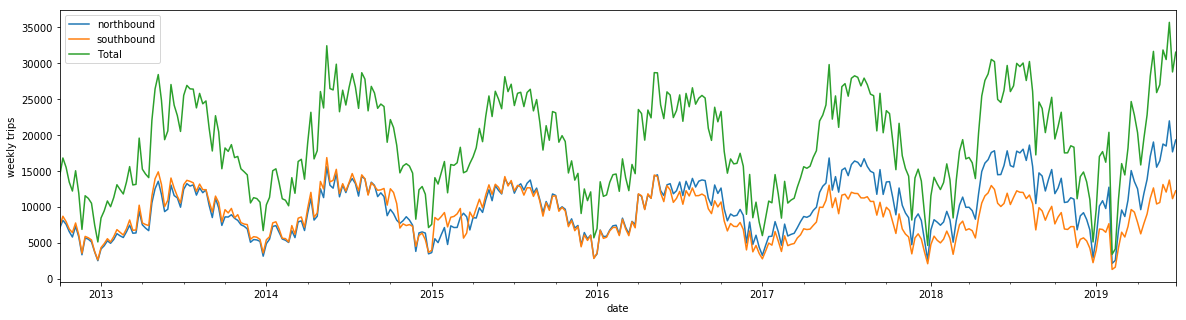

In [14]:
bridge.fillna(0, inplace=True)
bridge['Total'] = bridge.eval('northbound + southbound')

%matplotlib inline

import matplotlib
import numpy as np
import matplotlib.pyplot as plt

bridge.resample('W').sum().plot(figsize=(20,5))
plt.ylabel('weekly trips')

In [15]:
pivoted = bridge.pivot_table(['northbound', 'southbound'],
                           index=bridge.index.date,
                           columns=bridge.index.hour,
                           fill_value=0)
days=pivoted.index
pd.set_option('display.max_columns', 50)
pivoted.head(5)

northbound                                                          \
date               0  1  2  3  4   5   6    7    8    9   10  11  12  13   14   
2012-10-03          9  6  1  3  1  10  50   95  146  104  46  32  41  48   51   
2012-10-04         11  0  6  3  1  11  51   89  134   94  53  55  50  71   56   
2012-10-05          7  4  3  2  2   7  37  101  119   81  48  61  46  50   62   
2012-10-06          7  5  2  2  1   2  15   16   47   55  47  48  73  82  114   
2012-10-07          5  5  1  2  2   3   8   12   26   36  41  71  91  99  115   

                                                    southbound               \
date         15   16   17   18   19  20  21  22  23         0   1  2  3  4    
2012-10-03   92  182  391  258   69  51  38  25  12          4   4  1  2  6   
2012-10-04   74  161  353  241  107  56  39  21  30          7   3  3  0  7   
2012-10-05   84  190  290  209   73  41  31  26  16          4   4  4  2  7   
2012-10-06   96   76   73   55   38  18  15  20  19          8  10  7  1  4   
2012-10-07  109   93   73   45   23  36  35   9  11          6  12  2  4  1   

                                                                               \
date        5    6    7    8    9   10  11   12   13   14   15   16   17   18   
2012-10-03  21  105  257  291  172  72  10   35   42   77   72  133  192  122   
2012-10-04  15   91  230  284  147  67  53   54   55   63   73  114  154  137   
2012-10-05  18   68  218  251  131  71  43   55   62   63   80  120  144  107   
2012-10-06   3   12   17   58   59  68  76   91   95   89  115  107  107   41   
2012-10-07   6    9   14   43   67  67  94  100  129  126  122  132  118   68   

                                
date        19  20  21  22  23  
2012-10-03  59  29  25  24   5  
2012-10-04  57  27  31  25  11  
2012-10-05  42  27  11  10  16  
2012-10-06  40  25  18  14  15  
2012-10-07  26  19  12   9   5

In [16]:
X = pivoted.values
X.shape

(2462, 48)

Model-Based Anomaly Detection: Baysian Network

In [17]:
#Choose random hours for measurement
XX=X[:,[0,11,15,18,21]]
XX=XX/XX.sum(1).reshape(-1,1)
XX.shape

(2462, 5)

In [19]:
# convert to categorical
x=XX
xx=[]
for i in range(5):
    a=pd.cut(np.asarray(x)[:,i],3,labels=[0,1,2])
    xx.append(a)
x3=np.asarray(xx).T
data1=pd.concat((pd.DataFrame(days),pd.DataFrame(x3)),axis=1)
data1.columns=["date","T1","T2","T3","T4","T5"]
data1.head(5)

,date,T1,T2,T3,T4,T5
0,2012-10-03,0,0,0,2,0
1,2012-10-04,0,0,0,2,0
2,2012-10-05,0,0,0,1,0
3,2012-10-06,0,0,1,0,0
4,2012-10-07,0,0,1,0,0


In [67]:
from pgmpy.estimators import HillClimbSearch
from pgmpy.estimators import BdeuScore, K2Score, BicScore
from pgmpy.models import BayesianModel
from pgmpy.estimators import MaximumLikelihoodEstimator, BayesianEstimator

data=data1.iloc[:,1:]
hc = HillClimbSearch(data, scoring_method=BicScore(data))
best_model = hc.estimate()
print(best_model.edges())
model = BayesianModel(best_model.edges())

[('T4', 'T3'), ('T4', 'T2'), ('T4', 'T1'), ('T4', 'T5')]


In [71]:
model = BayesianModel(best_model.edges())
model.fit(data, estimator=MaximumLikelihoodEstimator)

for cpd in model.get_cpds():
    print("CPD of {variable}:".format(variable=cpd.variable))
    print(cpd)
    
print(model.get_independencies())

CPD of T1:
+-------+----------------------+----------------------+-------+
| T4    | T4(0)                | T4(1)                | T4(2) |
+-------+----------------------+----------------------+-------+
| T1(0) | 0.8766917293233083   | 0.962536023054755    | 1.0   |
+-------+----------------------+----------------------+-------+
| T1(1) | 0.10827067669172932  | 0.037463976945244955 | 0.0   |
+-------+----------------------+----------------------+-------+
| T1(2) | 0.015037593984962405 | 0.0                  | 0.0   |
+-------+----------------------+----------------------+-------+
CPD of T2:
+-------+----------------------+---------------------+-------+
| T4    | T4(0)                | T4(1)               | T4(2) |
+-------+----------------------+---------------------+-------+
| T2(0) | 0.6842105263157895   | 0.9711815561959655  | 1.0   |
+-------+----------------------+---------------------+-------+
| T2(1) | 0.3112781954887218   | 0.02881844380403458 | 0.0   |
+-------+---------------

In [ ]:
# Learing CPDs using Maximum Likelihood Estimators
model.fit(data, estimator=MaximumLikelihoodEstimator)

In [21]:
from pgmpy.inference import VariableElimination

infer = VariableElimination(model)

In [22]:
def logLiklihood(x,infer):
    a=x.T1
    b=x.T2
    c=x.T3
    d=x.T4
    e=x.T5
    return np.log((infer.query(['T1'], evidence={'T4': d}) ['T1']).values[a])+np.log(
    (infer.query(['T2'], evidence={'T4': d}) ['T2']).values[b])+np.log(
    (infer.query(['T3']) ['T3']).values[c])+np.log(
        (infer.query(['T4'], evidence={'T3': c}) ['T4']).values[d])+np.log(
        (infer.query(['T5'], evidence={'T4': d}) ['T5']).values[e])

In [23]:
logLiklihood(data1.iloc[0,1:],infer)

C:\Users\Tim\Anaconda3\lib\site-packages\pgmpy\factors\discrete\DiscreteFactor.py:586: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  phi.values = phi.values[slice_]
C:\Users\Tim\Anaconda3\lib\site-packages\pgmpy\factors\discrete\DiscreteFactor.py:598: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  phi1.values = phi1.values[slice_]


-0.6165472480311535

In [24]:
exmp=data1.iloc[:,:].apply(lambda x: logLiklihood(x,infer),axis=1)

C:\Users\Tim\Anaconda3\lib\site-packages\pgmpy\factors\discrete\DiscreteFactor.py:586: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  phi.values = phi.values[slice_]
C:\Users\Tim\Anaconda3\lib\site-packages\pgmpy\factors\discrete\DiscreteFactor.py:598: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  phi1.values = phi1.values[slice_]


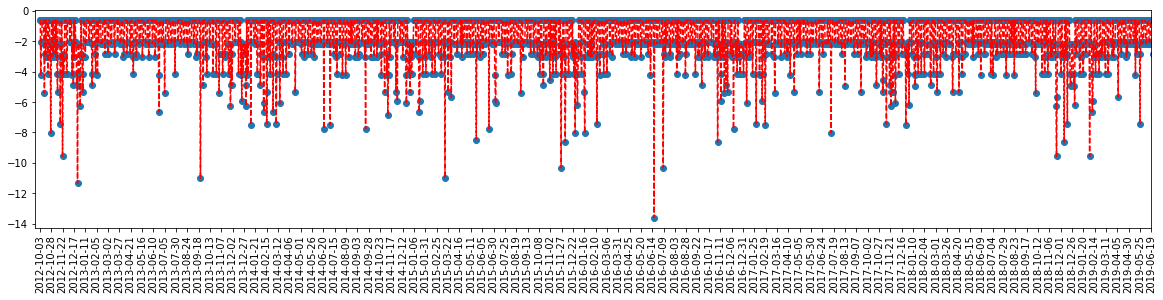

In [25]:
%matplotlib inline
import matplotlib.pylab as plt
plt.figure(figsize=(20,4))
plt.scatter(range(len(exmp)),exmp)
plt.plot(exmp,"r--")
plt.xlim(-10,1000)
plt.xticks(range(len(exmp))[::25],days[:2462][::25],rotation=90)
plt.show()

In [65]:
df_exmp = exmp.to_frame()
df_exmp = df_exmp.set_index(pivoted.index)
pivoted['exmp'] = df_exmp.iloc[:,0].values
pivoted.tail(5)

northbound                                                          \
date                0   1  2  3  4   5   6    7    8    9   10   11   12   13   
2019-06-26          9   5  2  1  7  27  89  268  388  202   92   68   68   87   
2019-06-27          6   4  2  1  2  23  77  155  282  158   84   70   65   59   
2019-06-28          6   3  0  2  5  23  76  185  310  227  120   85   89  115   
2019-06-29         17   6  1  2  1  10  22   31   61   84   90  148  158  156   
2019-06-30         18  10  7  0  2   4  16   25   56   92  141  148  187  190   

                                                         southbound            \
date         14   15   16   17   18   19  20  21  22  23          0   1  2  3   
2019-06-26  102  146  280  591  357  163  91  60  21  17          4   3  0  4   
2019-06-27   72  105  251  470  334  135  89  43  20  16          9   1  2  2   
2019-06-28  110  174  382  477  283  158  98  64  30  22          9   3  1  1   
2019-06-29  163  145  174  130  103   73  63  45  40  25         11   5  2  3   
2019-06-30  199  216  183  148  139   77  58  32  30  15          9  11  8  2   

                                                                              \
date        4   5   6    7    8    9   10   11   12   13   14   15   16   17   
2019-06-26  3  27  97  272  310  156   75   70   61   51   59   94  111  179   
2019-06-27  4  24  53  149  192  108   46   48   39   53   47   81  110  162   
2019-06-28  3  17  77  214  241  141   69   68   47   62   61   87  137  176   
2019-06-29  0   9   9   26   51   65   75  105  114  137  145  137  134  122   
2019-06-30  1   5  10   19   54   77  117  182  149  148  116  145  148   84   

                                         exmp  
date         18  19  20  21  22  23            
2019-06-26  134  56  49  44  27   5 -0.616547  
2019-06-27  121  72  53  39  16  15 -0.616547  
2019-06-28  138  65  66  36  21  13 -2.162013  
2019-06-29  107  57  51  41  17  12 -2.027275  
2019-06-30   68  58  72  31  20   7 -2.027275

In [66]:
anomaly = pivoted.loc[(pivoted['exmp'] < -8)]
anomaly

northbound                                                         \
date                0  1   2  3  4   5   6    7    8    9   10   11   12  13   
2012-10-27          6  3  10  1  3   6   6    6   13   11   11    9   12  13   
2012-11-22          3  1   1  1  0   3   3    5   10   22   25   40   29  21   
2012-12-25          1  0   0  1  0   0   1    2    1    5    2    3    3   8   
2013-09-22         10  5   4  2  1   4   7    8   20   30   45   28   19  14   
2015-03-15          3  6   4  2  0   2   3    2    7    8    4    6    8   3   
2015-05-23          9  9   0  2  1   5  11   20   34   23   44   49   52  61   
2015-11-26          4  3   0  1  1   2   2    4    8   12   16   20   34  33   
2015-12-05         12  4   1  3  2   1   3    9   24    7    8   11   12  11   
2015-12-27          3  4   0  1  1   2   4    2    7   12    8    3    7   7   
2016-01-17          9  1   0  1  1   2   3    4   12    7   10   10   16  16   
2016-06-18          3  5   2  2  1   2  13   23   23   49   36   56   52  66   
2016-07-08          6  2   1  2  2   9  46   95  153   84   29   32   45  38   
2016-11-05         11  5   3  6  4   4   1    5   19    6    9   10    9  21   
2017-07-13          9  1   1  0  6  14  67  178  282  138   63   44   47  46   
2018-11-22          2  1   0  0  3   2   2    9   11   24   25   25   24  16   
2018-12-09          5  3   5  0  3   4   6    7   13    9   11    5   14   9   
2019-02-03          6  4   1  0  4   3   7  184  332  357  620  619  165  71   

                                                          southbound         \
date        14  15   16   17   18   19   20   21  22   23          0   1  2   
2012-10-27  28  21   32   10    7    7    3   11   5    8          6   6  6   
2012-11-22  18  14    9    2    2    6    5    1   4    4          5  38  3   
2012-12-25   4   1    5    5    1    1    0    3   0    1          1   2  1   
2013-09-22  18  12   41   26   30   17   22    6   8    4         11   5  4   
2015-03-15   6   3   12    8    6    6    3    0   2    3          4   0  2   
2015-05-23  59  44   62   71   43   36   40   48  35   18          6   0  3   
2015-11-26  31  12    7    2    4    5    7   60   2    3          3   4  3   
2015-12-05  11   7   16    7   14    3    4    9   3    5          7   6  2   
2015-12-27   7   6    9    4    2    4    1    4   3    1          2   1  2   
2016-01-17  19  16   12   24    8   14    5   12  10    4          1   6  0   
2016-06-18  22   9   14   49   42   38   18   28  15   18          9   2  1   
2016-07-08  63  84  212  379  188  118   67  407  89  140          2   0  2   
2016-11-05  11   5   13   14    7   11    4    3   7    6          7   8  1   
2017-07-13  74  99  259  501   17  125  146   45  44   13          9   1  1   
2018-11-22   8   5    1    4    1    3    0    2   7    1          1   1  1   
2018-12-09  10   3   10    6    5    3   10    1   2    1          2   0  1   
2019-02-03  36  10   13    6    1    4    6    1   1    1          4   1  0   

                                                                            \
date        3  4   5    6    7    8    9  10  11  12  13  14  15   16   17   
2012-10-27  1  2   7    7    9   12   14  10  22  13  28  23  30   27   26   
2012-11-22  3  1   1    1    5   13   22  39  48  39  29  19  17   14    5   
2012-12-25  1  1   1    2    2    3    2   4   0   4   3   4   2    2    6   
2013-09-22  3  5   3   10   11   21   34  41  43  35  15  16  13   29   28   
2015-03-15  1  0   2    4    4   11   11   8   8   9  10   5  13    5   10   
2015-05-23  2  2   5    9   13   35   39  63  72  87  61  88  57   60   71   
2015-11-26  1  0   2    5    6    5   12  22  33  46  28  34  14   14    5   
2015-12-05  0  3   4   12    9   24   21  17  18  11  13  11   8    5   18   
2015-12-27  1  0   1    5    3    7    4  12  15   5   7   9   5    5    1   
2016-01-17  0  0   2    2    3   12    8  11   9  20  13  18  24   24   10   
2016-06-18  0  0   9   15   20   29   34  33  45  37